<a href="https://colab.research.google.com/github/georgesteve/Code2/blob/master/Comparativa_entre_KNN,_Desicion_Trees_y_Esemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparativa entre KNN, Desicion Trees y Esemble Learning

## Introdución

Para la presentacion de la practica 3 y 4 del curso de Inteligencia Artificial a cargo del Dr. Ing. Paul Cardenas, para lo cual realizamos lo siguiente:
Usando una base de datos para selección del color de los vinos, entre estos datos estan contenidos propiedades quimicas del vino, ademas de caracteristicas de calidad (3-9 mas es mejor) y por último el color del vino (rojo y blanco). El nombre del archivo es 'Wine_Quality_Data.csv'.

## Carga de la Data


In [0]:



%matplotlib inline
from __future__ import print_function
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


# Cargar el Drive helper y mount
from google.colab import drive

# Link y Codigo de autorizacion.
drive.mount('/content/drive_all')

# Cargar datos del google drive
data_path = ['data']
filepath = pd.read_csv('/content/drive_all/My Drive/dataset/Wine_Quality_Data.csv')



#filepath = os.sep.join(data_path + filepath)
#data = pd.read_csv(filepath, sep=',')

print(filepath)

data=filepath;



Drive already mounted at /content/drive_all; to attempt to forcibly remount, call drive.mount("/content/drive_all", force_remount=True).
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36   

## Revisión de las Caractericas (Features) de la Data

* Examinamos la data.

In [0]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


* Vemos el tipo de variable que acompaña a cada caracteristica.

In [0]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                     int64
dtype: object

* Cambiamos el formato de los datos en la columna de 'color' para asi poder usarlos.

In [0]:
data['color'] = data.color.replace('white',0).replace('red',1).astype(np.int)

# Desicion Trees

## Separación de la Data

* Usando `StratifiedShuffleSplit` para separar la data en una entrenamiento y en una de prueba.

In [0]:
feature_cols = [x for x in data.columns if x not in 'color']

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

Data_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)

train_idx, test_idx = next(Data_split.split(data[feature_cols], data['color']))

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

* Verificando que se separo bien la data.

In [0]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3627,8.9,0.21,0.34,7.1,0.037,33.0,150.0,0.99620,3.10,0.45,9.7,6
1932,6.5,0.28,0.34,9.9,0.038,30.0,133.0,0.99540,3.11,0.44,9.8,5
5055,6.0,0.39,0.13,1.2,0.042,60.0,172.0,0.99114,3.06,0.52,10.6,5
2372,6.1,0.27,0.30,16.7,0.039,49.0,172.0,0.99985,3.40,0.45,9.4,5
158,7.1,0.68,0.00,2.2,0.073,12.0,22.0,0.99690,3.48,0.50,9.3,5


## Generando el modelo de Desicion Trees

* Ajustando el modelo con la parte de entrenamiento que separamos anteriormente, no usaremos profundidad máxima, cantidad de nodos ni cantidad de caracteristicas.

In [0]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

* Número de nodos y máxima produndidad.

In [0]:
dt.tree_.node_count, dt.tree_.max_depth

(171, 22)

* Función para medir el error.

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def errorfunc(y, y_pred, label):
    return pd.Series({'exactitud':accuracy_score(y, y_pred),
                      'precisión': precision_score(y, y_pred),
                      'recall': recall_score(y, y_pred),
                      'f1': f1_score(y, y_pred)},
                      name=label)

* Calculando el Error.

In [0]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

full_error = pd.concat([errorfunc(y_train, y_train_pred, 'train'),
                              errorfunc(y_test, y_test_pred, 'test')],
                              axis=1)

full_error

,train,test
exactitud,0.999818,0.984000
f1,0.999631,0.967611
precisión,0.999261,0.963710
recall,1.000000,0.971545


## Grid para la optimización de parametros

* Ajustando el modelo con grid para mejorar la presicion y eliminando el overfiting.

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='precision',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

* Número de nodos y máxima produndidad.

In [0]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(129, 9)

* Calculando el Error.

In [0]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([errorfunc(y_train, y_train_pred_gr, 'train'),
                                 errorfunc(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [0]:
train_test_gr_error

,train,test
exactitud,0.997089,0.990000
precisión,0.998509,0.983607
recall,0.989653,0.975610
f1,0.994061,0.979592


## Desicion Tree para prediccion de valores continuos

* Re-separamos la data `X` e `y`, está vez trataremos de predecir la cantidad de alcohol del vino.

In [0]:
feature_cols = [x for x in data.columns if x != 'alcohol']

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'alcohol']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'alcohol']

* Usando Grid para predecir el modelo.

In [0]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_alcohol = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                      n_jobs=-1)

GR_alcohol = GR_alcohol.fit(X_train, y_train)

* Número de nodos y máxima produndidad.

In [0]:
GR_alcohol.best_estimator_.tree_.node_count, GR_alcohol.best_estimator_.tree_.max_depth

(1787, 11)

The error on train and test data sets. Since this is continuous, we will use mean squared error.

In [0]:
from sklearn.metrics import mean_squared_error

y_train_pred_alcohol = GR_alcohol.predict(X_train)
y_test_pred_alcohol  = GR_alcohol.predict(X_test)

alcohol_error = pd.Series({'train': mean_squared_error(y_train,y_train_pred_alcohol),
                                         'test':  mean_squared_error(y_test, y_test_pred_alcohol )},
                                          name='MSE').to_frame().T

alcohol_error

,test,train
MSE,0.299873,0.086691


Comparemos los valores reales con los obtenidos.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

% matplotlib inline

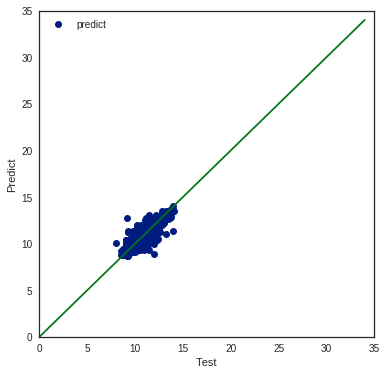

In [0]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

alcohol_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_pred_alcohol}).set_index('test').sort_index()

alcohol_test_predict.plot(marker='o', ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,35), ylim=(0,35));

from matplotlib import pyplot
x = range(35);
y = x;
a = pyplot.plot(x,y)



# KNN
